# Mobile phone lying still on table 

Importing libraries needed to run the rest of the notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read and check Data

Reading CSV files from [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/dev?id=6483394247866966083&hl=en) by [Vieyra Software](https://www.vieyrasoftware.net/). There are some formatting issues with the files. Most importantly, the file is stored with an em-dash instead of hyphen. That I fixed manually before trying to import. 

In [2]:
filename = '2022-08-0719.04.25 phone lying still in living room.csv'
data = pd.read_csv(filename, delimiter=';',decimal=',',index_col=0)

### Check files

Before moving on we should briefly check what we have imported.

In [3]:
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Unnamed: 10
time,,,,,,,,,,
0.037052,"0,0000","0,0000",0.0000,"0,0000","0,0000","0,0000","0,0858","0,0279","−0,0376",NaN
0.097072,"0,0000","0,0000",0.0000,"0,0000","0,0000","0,0000","−0,0089","−0,1871","0,0082",NaN
0.097695,"0,0000","0,0000",0.0000,"−6,7458","3,0130","−4,2359","−0,0089","−0,1871","0,0082",NaN
0.148823,"0,0000","0,0000",0.0000,"−6,7458","3,0130","−4,2359","0,2569","0,0884","−0,0621",NaN
0.149534,"0,0000","0,0000",0.0000,"−6,7754","2,9833","−4,2238","0,2569","0,0884","−0,0621",NaN
...,...,...,...,...,...,...,...,...,...,...
535.752289,"−0,1153","0,3017",0.9953,"−0,1567","0,1217","0,4185","0,6016","−0,0891","−0,1528",NaN
535.752780,"−0,1153","0,3017",0.9953,"−0,1130","0,3235","0,3627","0,6016","−0,0891","−0,1528",NaN
535.800635,"−0,0523","0,2763",0.9843,"−0,1130","0,3235","0,3627","0,6016","−0,0891","−0,1528",NaN


There is one column too much, due to a semicolon at the end of the file. Therefore, we remove the extra column like this:

In [4]:
data = data.drop(data.columns[9],axis=1)
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz
time,,,,,,,,,
0.037052,"0,0000","0,0000",0.0000,"0,0000","0,0000","0,0000","0,0858","0,0279","−0,0376"
0.097072,"0,0000","0,0000",0.0000,"0,0000","0,0000","0,0000","−0,0089","−0,1871","0,0082"
0.097695,"0,0000","0,0000",0.0000,"−6,7458","3,0130","−4,2359","−0,0089","−0,1871","0,0082"
0.148823,"0,0000","0,0000",0.0000,"−6,7458","3,0130","−4,2359","0,2569","0,0884","−0,0621"
0.149534,"0,0000","0,0000",0.0000,"−6,7754","2,9833","−4,2238","0,2569","0,0884","−0,0621"
...,...,...,...,...,...,...,...,...,...
535.752289,"−0,1153","0,3017",0.9953,"−0,1567","0,1217","0,4185","0,6016","−0,0891","−0,1528"
535.752780,"−0,1153","0,3017",0.9953,"−0,1130","0,3235","0,3627","0,6016","−0,0891","−0,1528"
535.800635,"−0,0523","0,2763",0.9843,"−0,1130","0,3235","0,3627","0,6016","−0,0891","−0,1528"


Let us just check what data types we have read in: 

In [5]:
data.dtypes

gFx     object
gFy     object
gFz    float64
ax      object
ay      object
az      object
wx      object
wy      object
wz      object
dtype: object

There is obviously something wrong, since only one column has loaded with float values. By visual inspection we see that the minus signs are coded with a − (n-dash) instead of hyphen. This makes the importer fail, so that the decimal marker has not properly been changed from comma (,) to dot (.). So we need to change this. 

In [6]:
# Replacing n-dash with hyphen
data=data.replace(to_replace='−', value='-',regex=True)
# Replacing comma with dot
data=data.replace(to_replace=',', value='.',regex=True)
# Replacing comma with dot
data=data.replace(to_replace='∞', value='0',regex=True)
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz
time,,,,,,,,,
0.037052,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0858,0.0279,-0.0376
0.097072,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0089,-0.1871,0.0082
0.097695,0.0000,0.0000,0.0000,-6.7458,3.0130,-4.2359,-0.0089,-0.1871,0.0082
0.148823,0.0000,0.0000,0.0000,-6.7458,3.0130,-4.2359,0.2569,0.0884,-0.0621
0.149534,0.0000,0.0000,0.0000,-6.7754,2.9833,-4.2238,0.2569,0.0884,-0.0621
...,...,...,...,...,...,...,...,...,...
535.752289,-0.1153,0.3017,0.9953,-0.1567,0.1217,0.4185,0.6016,-0.0891,-0.1528
535.752780,-0.1153,0.3017,0.9953,-0.1130,0.3235,0.3627,0.6016,-0.0891,-0.1528
535.800635,-0.0523,0.2763,0.9843,-0.1130,0.3235,0.3627,0.6016,-0.0891,-0.1528


In [7]:
# Now that the data should have been formatted correctly, we can change to float64
data=data.astype(float)
data.dtypes

gFx    float64
gFy    float64
gFz    float64
ax     float64
ay     float64
az     float64
wx     float64
wy     float64
wz     float64
dtype: object

### Trim the data

I know that there is some extra motion in the beginning and end when I start and stop the recording. So we want to trim the data slightly. First, we need to check how much to trim.

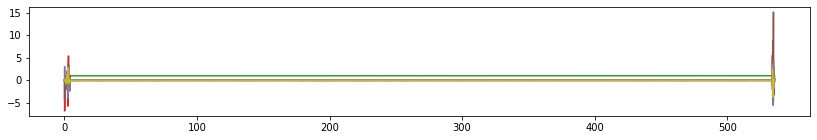

In [8]:
# Plot the data to get an idea of the temporal development.

fig = plt.figure(figsize=(14,2))
plt.plot(data);

Since the data have different values, it is difficult to see exactly what is happening at the beginning and end. Let us therefore look at one of the the accelerometer values to investigate what goes on.

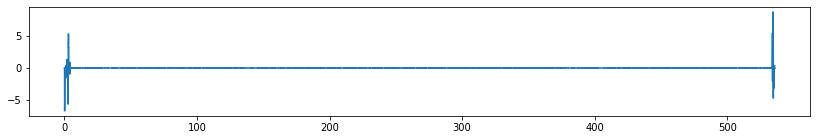

In [9]:
fig = plt.figure(figsize=(14,2))
plt.plot(data.ax);

We can see that there is a lot of motion in the beginning and some in the end. So we want to remove those parts.

In [10]:
# Removing samples from the beginning
data_without_beginning = data.tail(-1500)

#Removing samples from the end
data_clean = data_without_beginning.head(-500)

Checking that we managed to remove enough

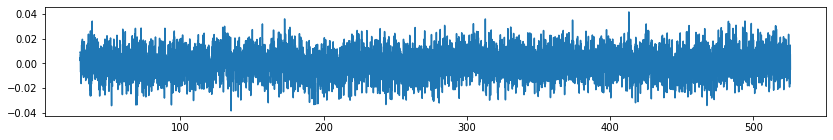

In [11]:
fig = plt.figure(figsize=(14,2))
plt.plot(data_clean.ax);

And then we can plot everything again.

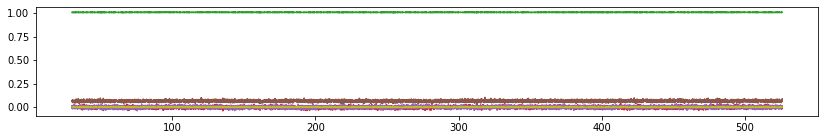

In [12]:
fig = plt.figure(figsize=(14,2))
plt.plot(data_clean);

Then we are ready to look at the content.

## Analysis

Let us look some more at the data.

### Descriptive statistics

In [13]:
data.describe(include='all')

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz
count,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000
mean,-0.010713,0.009064,1.006844,-0.000886,-0.007342,0.072392,-0.001120,-0.000234,-0.000249
std,0.022943,0.033667,0.024631,0.276606,0.182704,0.216702,0.073987,0.139380,0.115436
min,-0.578500,-0.448500,0.000000,-6.775400,-5.550300,-4.235900,-1.782600,-4.940600,-3.643300
25%,-0.011700,0.006100,1.006800,-0.007800,-0.005500,0.060900,-0.000700,-0.000500,-0.000500
50%,-0.011000,0.006800,1.007300,-0.000900,0.001200,0.065800,-0.000100,0.000100,0.000000
75%,-0.010300,0.007300,1.008000,0.006300,0.008000,0.072900,0.000500,0.000200,0.000600
max,0.768900,0.730500,2.207400,8.842300,3.013000,15.171200,3.409200,4.143600,2.846300


These are descriptions of the data and the units used:

| Name           | Description   | Unit |
|:----           |:-----------   |:---- |
| gFx            | g-force X     | FN/Fg |
| gFy            | g-force Y     | FN/Fg |
| gFz            | g-force Z     | FN/Fg |
| ax             | linear acceleration X | m/s2 |
| ay             | linear acceleration Y | m/s2 |
| az             | linear acceleration Z | m/s2 |
| wx             | gyroscope X   | rad/s |
| wy             | gyroscope Y   | rad/s |
| wz             | gyroscope Z   | rad/s |

The g-force and gyroscope are measured sensor values, while the "linear acceleration" is a combination of these sensors. Vieyra Software writes on the [app web page](https://www.vieyrasoftware.net/sensors-sensor-modes) about how it is calculated:

> Linear acceleration is derived from the g-force meter, but also uses the gyroscope and the magnetometer to negate the effects of the earth’s gravitational field on the sensor.

It is the linear acceleration that is most interesting in my case, so we can look at violin plots of the distribution of each axis: 

/home/alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


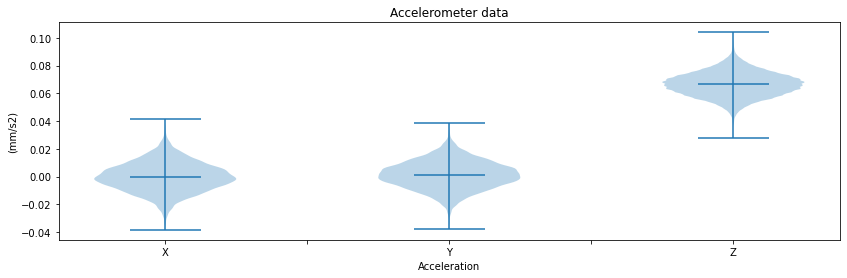

<Figure size 432x288 with 0 Axes>

In [14]:
fig, ax = plt.subplots(figsize=(14,4))

ax.violinplot([data_clean['ax'],data_clean['ay'],data_clean['az']], showmeans=True)
plt.title('Accelerometer data')
ax.set_xticklabels(["", "X", "", "Y", "", "Z"])
plt.xlabel('Acceleration');
plt.ylabel('(mm/s2)');

plt.show()
plt.savefig("accelerometer_violinplots.png", bbox_inches='tight')

The distribution looks quite similar for each axis and the values are also very small. 

### Temporal development

Let us start by looking at the temporal development of data from the linear acceleration data.

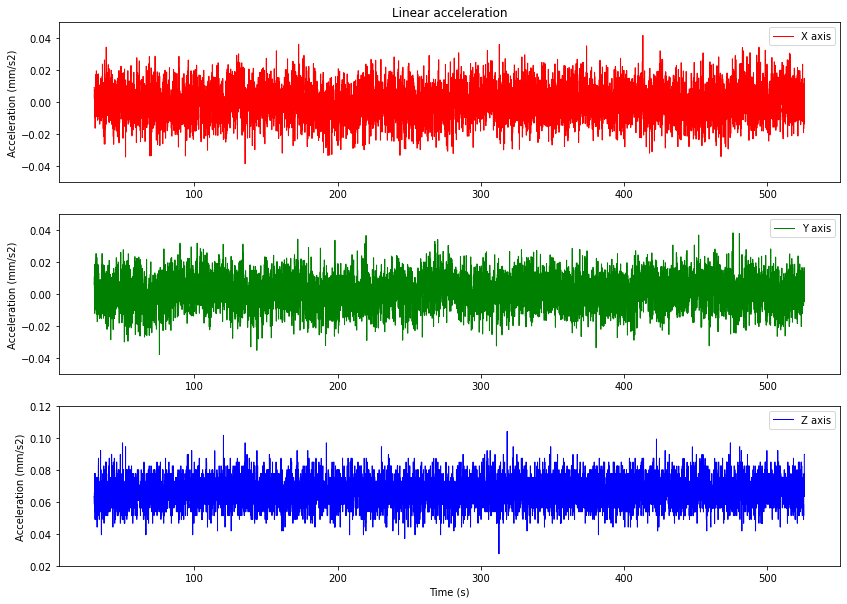

In [15]:
fig = plt.figure(figsize=(14,10))
aa1 = plt.subplot(3, 1, 1)
aa1.plot(data_clean['ax'], lw=1, label='X axis', color='red') #Displacement on x axis
aa1.legend(loc='upper right')
aa1.set_ylim(-0.05, 0.05)
plt.ylabel('Acceleration (mm/s2)');
plt.title('Linear acceleration')

aa2 = plt.subplot(3, 1, 2)
aa2.plot(data_clean['ay'], lw=1, label='Y axis', color='green') #Displacement on x axis
aa2.set_ylim(-0.05, 0.05)
aa2.legend(loc='upper right')
plt.ylabel('Acceleration (mm/s2)');

aa3 = plt.subplot(3, 1, 3)
aa3.plot(data_clean['az'], lw=1, label='Z axis', color='blue') #Displacement on x axis
aa3.set_ylim(0.02, 0.12)
aa3.legend(loc='upper right')
plt.ylabel('Acceleration (mm/s2)');

#plt.tick_params(axis='both', which='major')

plt.xlabel('Time (s)');
fig.savefig("accelerometer_time.png", bbox_inches='tight')

As expected, the data varies slightly over time, but the numbers are very small. Note that the X and Y data are centred around 0, while the Z data are slightly above 0. This may be due to lack of calibration. The app provides in-app calibration of the sensors, so I will try that for the next run.

We can also inspect the spatial distribution of the same sensor data.

### Spatial trends

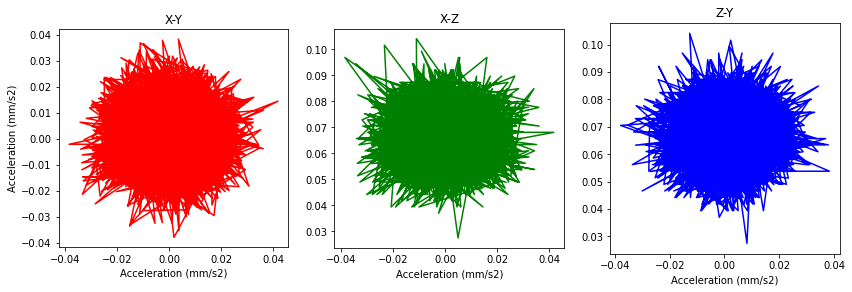

In [16]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(data_clean['ax'], data_clean['ay'], color='r') #XY plane
plt.ylabel('Acceleration (mm/s2)');
plt.xlabel('Acceleration (mm/s2)');
plt.title('X-Y')
aa.set_aspect('equal')

ab = plt.subplot(1, 3, 2)
plt.plot(data_clean['ax'], data_clean['az'], color='g') #XZ plane
plt.xlabel('Acceleration (mm/s2)');
plt.title('X-Z')
ab.set_aspect('equal')

ac = plt.subplot(1, 3, 3)
plt.plot(data_clean['ay'], data_clean['az'], color='b') #ZY plane
plt.xlabel('Acceleration (mm/s2)');
plt.title('Z-Y')
ac.set_aspect('equal')

fig.savefig("accelerometer_planar.png", bbox_inches='tight')

Nothing special to report here either. The spatial distribution looks fine, with some spikes here and there.